In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Matplotlib for plotting
%matplotlib inline
from matplotlib import pyplot as plt

# Some scipy functions for sparse diagonal matrices
from scipy.sparse import diags

# scipy function to numerically calculate integral
from scipy import integrate

# By using trange instead of range, we get a nice progress bar
from tqdm import trange

# just-in-time (jit) compiler from numba, to speed up the loop in the TDMA solver
# If this line gives you trouble, then you can either
# install numba (recommended) or you can comment it out
from numba import jit

In [8]:
#trying to implement

def u0(x):
    return np.exp(-400*(x-0.5)**2)

#choosing h and k
h = 0.001
k = 0.000045


#making x grid and t grid, not sure whether useful
xs = np.arange(0,1,h)
xs = np.append(xs,1)




def func(t,y):
    
    """h=0.001"""
    
    upper = np.ones(len(y)-1)
    middle = np.zeros_like(y)
    #the lower one will be equivalent to minus upper
    lower = - upper

    R  = diags(diagonals = [(-1/(2*h))*upper, (-1/(2*h))*middle, (-1/(2*h))*lower], offsets = [1, 0, -1])
    
    v_dot = R.dot(y)
    
    v = v_dot*y
    
    return v

u_nil=u0(xs)



In [46]:
sol = integrate.solve_ivp(func,(0,0.6),u_nil)

In [47]:
y_lst = sol.y
t_lst = sol.t

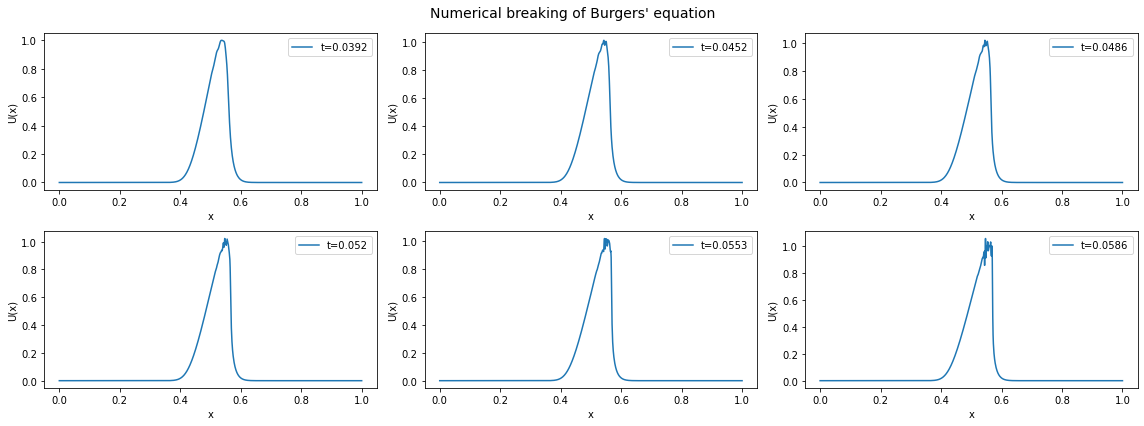

In [48]:
plt.figure(figsize = (16,6))

for i in range(4,10):
    plt.subplot(2,3,i-3)
    
    plt.plot(xs,y_lst[:,i],label="t="+str(round(t_lst[i],4)))
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("U(x)")
#plt.tight_layout()
plt.suptitle("Numerical breaking of Burgers' equation",size = 14)
plt.tight_layout()
plt.savefig('burgers.png')
plt.show()